## Problem Statement : 
In this notebook we will be analyzing a retail company data of customer purchase behavior against factors such as : Gender, Age, Marital Status to provide suitable recommendations.

We will do so by constructing confidence intervals for avergae purchase across different categories. 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
wl = pd.read_csv("data/retail_data.csv")

In [3]:
wl.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [4]:
wl.shape

(550068, 10)

In [5]:
wl['User_ID'].nunique()

5891

So we see that the data corresponds to 5891 customers.

In [6]:
wl.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [7]:
wl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [8]:
wl[['User_ID','Gender']].drop_duplicates()['Gender'].value_counts(normalize=True)

M    0.717196
F    0.282804
Name: Gender, dtype: float64

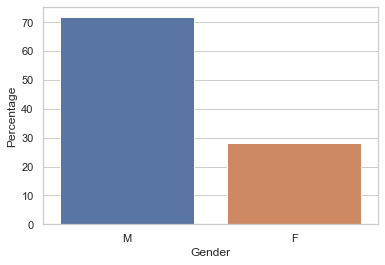

In [9]:
sns.set_theme(style="whitegrid")
xgndr = wl[['User_ID','Gender']].drop_duplicates()['Gender'].value_counts(normalize=True)
sns.barplot(x = xgndr.index, y = xgndr.values*100)
plt.xlabel("Gender")
plt.ylabel("Percentage")
plt.show()

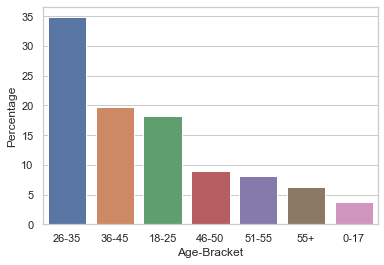

In [10]:
sns.set_theme(style="whitegrid")
xage = wl[['User_ID','Age']].drop_duplicates()['Age'].value_counts(normalize=True)
sns.barplot(x = xage.index, y = xage.values*100)
plt.xlabel("Age-Bracket")
plt.ylabel("Percentage")
plt.show()

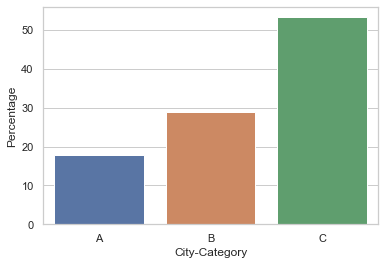

In [11]:
sns.set_theme(style="whitegrid")
xcity = wl[['User_ID','City_Category']].drop_duplicates()['City_Category'].value_counts(normalize=True)
sns.barplot(x = xcity.index, y = xcity.values*100, order = ['A','B','C'])
plt.xlabel("City-Category")
plt.ylabel("Percentage")
plt.show()

In [12]:
xcity

C    0.532847
B    0.289764
A    0.177389
Name: City_Category, dtype: float64

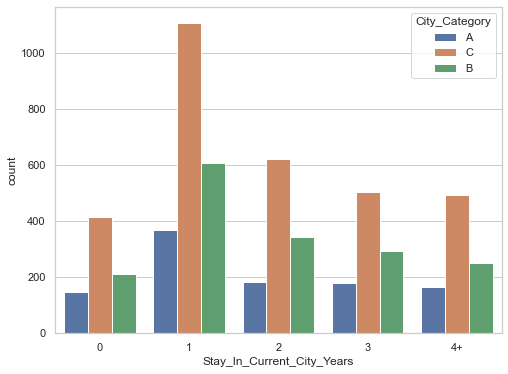

In [13]:
plt.figure(figsize=(8,6))
xstaycity = wl[['User_ID','Stay_In_Current_City_Years','City_Category']].drop_duplicates()
sns.countplot(x="Stay_In_Current_City_Years",hue="City_Category",data=xstaycity, order = ['0','1','2','3','4+'])
plt.show()

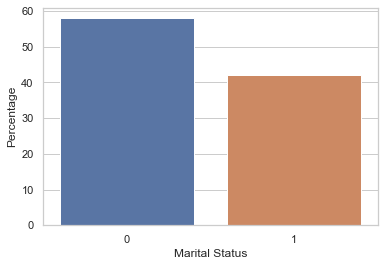

In [14]:
sns.set_theme(style="whitegrid")
xmarital = wl[['User_ID','Marital_Status']].drop_duplicates()['Marital_Status'].value_counts(normalize=True)
sns.barplot(x = xmarital.index, y = xmarital.values*100)
plt.xlabel("Marital Status")
plt.ylabel("Percentage")
plt.show()

In [15]:
xmarital

0    0.580037
1    0.419963
Name: Marital_Status, dtype: float64

C:\Users\ANWESHA\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


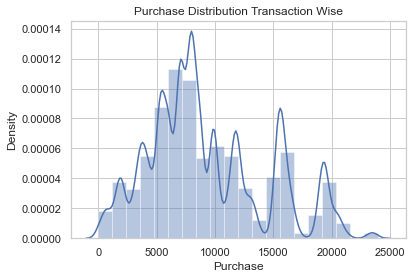

In [16]:
sns.distplot(wl.Purchase, bins=20)
plt.title("Purchase Distribution Transaction Wise")
plt.show()

C:\Users\ANWESHA\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


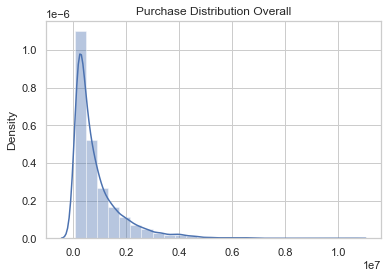

In [17]:
plt.figure(figsize=(6,4))
sns.distplot(wl.groupby("User_ID")["Purchase"].sum().values, bins=25)
plt.title("Purchase Distribution Overall")
plt.show()

C:\Users\ANWESHA\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


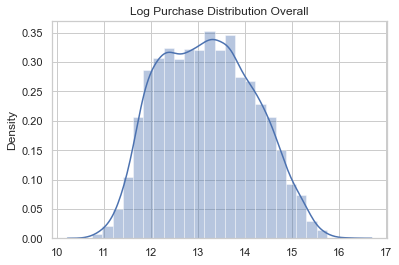

In [18]:
plt.figure(figsize=(6,4))
sns.distplot(np.log(wl.groupby("User_ID")["Purchase"].sum().values), bins=25)
plt.title("Log Purchase Distribution Overall")
plt.show()

### Some Basic Observations 


#### Basic Observations about the Dataset : 
There are about 550K observations and 10 features.

The features are: 
- User_ID:	User ID
- Product_ID:	Product ID
- Gender: Can either be M or F. There are about 72% Male customers and 28% Female customers (considering unique User IDs).
- Age:	Age in bins. Almost 35% of customers are in the 26-35 age bracket, followed by 36-45 (20%) and 18-25 (18%).
- Occupation:	Occupation(Masked) - Can take values ranging from 0 to 20.
- City_Category:	Category of the City (A,B,C). About 53% customers live in category C, 29% live in cateogry B city and 18 % live in A.
- StayInCurrentCityYears:	Number of years stay in current city. The highest number of customers have stayed in their current city for 1 year, suggesting that newly relocated people bought more products during black Friday sale. City trends are somewhat consistent across years of stay, with highest number of people living in category 'C'. followed by 'B' and 'A'. 
- Marital_Status:	Marital Status. 58% of customers are unmarried and 42% are married.
- ProductCategory:	Product Category (Masked) -  Can take values from 1 to 20.
- Purchase:	Purchase Amount
    - If we look at transaction wise distribution of purchases, the most frequent purchase bracket seems to be around 7500. The distribution is not unimodal. The mean and median purchase amounts are around 9200 and 8000 respectively. The minimum amount seems to be 12 and maximum 23961.
    - If we look at the overall distribution of purchases (transactions by single customer clubbed together), the the distribution seems to be somewhat following a log-normal distribution.

### Bivariate Analysis and Outlier Analysis

We look at the 'Purchase' variable and remove outliers. There are no null values, so we do not need to replace nulls for any feature.

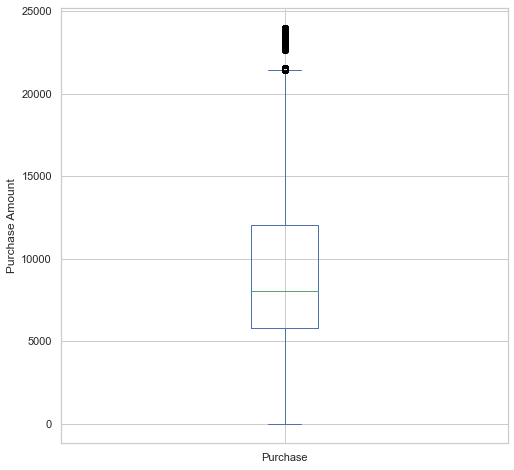

In [19]:
wl["Purchase"].plot.box(figsize=(8,8))
plt.ylabel("Purchase Amount")
plt.show()

In [20]:
q99 = wl["Purchase"].quantile(0.99)
q99

20665.0

So it seems from the boxplot that purchase amounts above 22000 are outliers. We also see that 99% of the purchase amounts are all below 20665. We set those outliers to this 99th percentile value.

In [21]:
wl["Purchase"] = np.where(wl["Purchase"]>q99, q99, wl["Purchase"])

Next, we will pick some features of interest and check their relations with purchase amount.

#### Note: All the analysis done from here onwards considers transaction wise purchase figures, not overall purchase figures.

#### Purchase Amount vs Gender

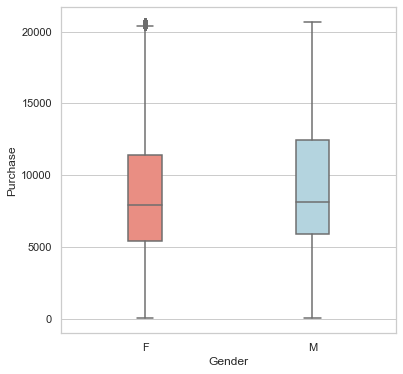

In [22]:
plt.figure(figsize=(6,6))
pal = {"M": "lightblue", "F": "salmon"}
sns.boxplot(x=wl['Gender'],y=wl['Purchase'], palette=pal, width=0.2)
plt.ylabel("Purchase")
plt.show()

There seems to be some difference between the median transaction wise purchase amounts for Male and Female customers, but we would have to formally check that to be sure.

The 25th and 75th Percentile purchases seem to be greater for Males than Females.

#### Purchase Amount vs Marital Status

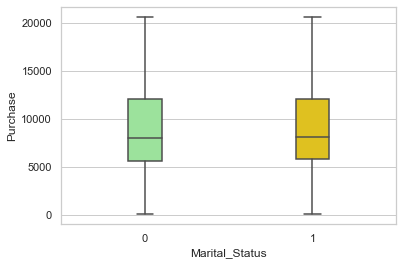

In [23]:
pal = {0: "lightgreen", 1: "gold"}
sns.boxplot(x=wl['Marital_Status'],y=wl['Purchase'], palette=pal, width=0.2)
plt.ylabel("Purchase")
plt.show()

Again, from the boxplot, there does not seem to be any significant difference in transaction wise purchases made by married and unmarried customers.

#### Purchase Amount vs Age

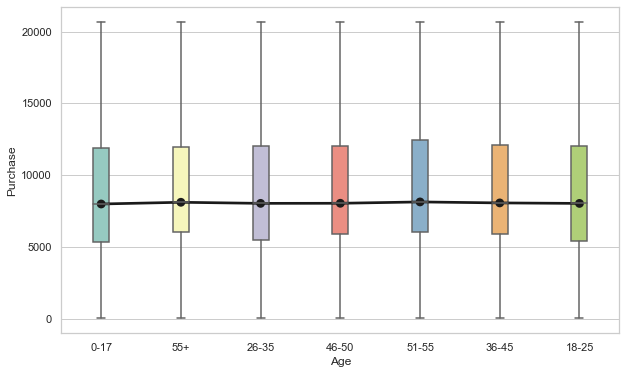

In [24]:
x = ['0-17','55+','26-35','46-50','51-55','36-45','18-25']
y = [np.median(wl[wl['Age']==age]['Purchase']) for age in x]

plt.figure(figsize=(10,6))
sns.boxplot(x=wl['Age'],y=wl['Purchase'], palette="Set3", width=0.2)
sns.pointplot(x=x, y=y, width=0.1, color='k')
plt.ylabel("Purchase")
plt.show()

There are differences, however we need to perform further analysis to check how significant those differences are.

Now we shall move on to detailed analysis of Transactional Purchase Amount based on Gender, Age and Marital Status

### Gender

We use a technique called Bootstrapping ('Sampling with replacement' or 'Resampling Technique' - an observation sampled once, has the same chance of being sampled again) and repeatedly select samples from the sample which we already have. 

Thereafter we check the sampling distribution to determine our confidence intervals.

In [25]:
wlM = wl[wl.Gender=='M']
wlF = wl[wl.Gender=='F']

print("Average Purchase by Male Customers",np.mean(wlM["Purchase"]))
print("Average Purchase by Female Customers",np.mean(wlF["Purchase"]))

Average Purchase by Male Customers 9423.229223746497
Average Purchase by Female Customers 8721.925108056166


We perform experiments using sample sizes of 10000,20000,50000 and 100000 for both Males and Females.

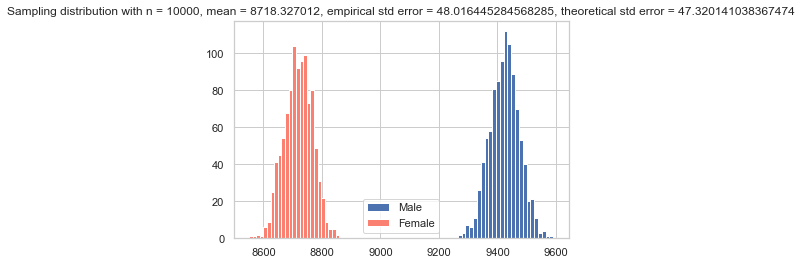

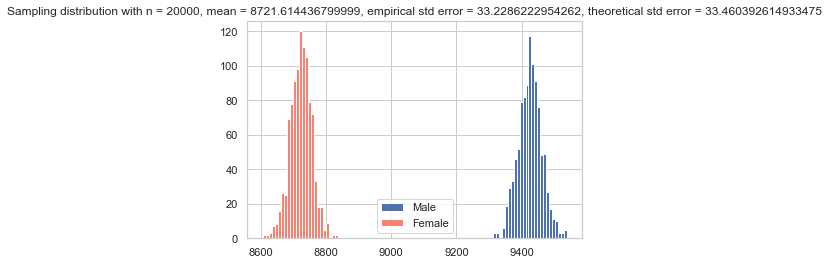

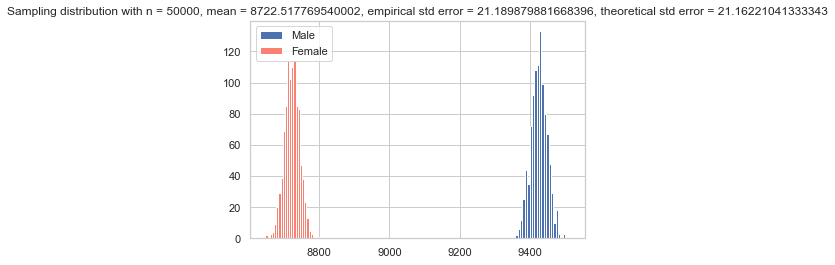

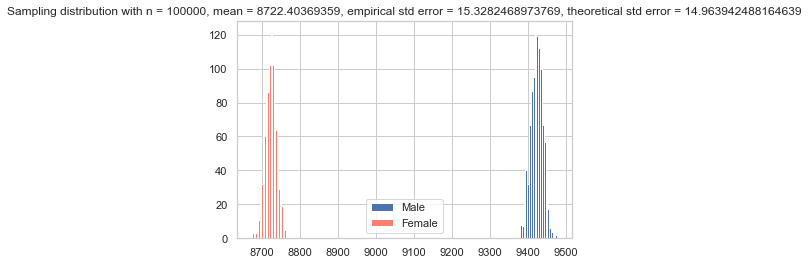

In [26]:
r = 1000 #No of samples
n_list = [10000,20000,50000,100000] #Size of each sample

sampleM = wlM["Purchase"]
sampleF = wlF["Purchase"]


for n in n_list:
    bs_meansM = np.empty(r)
    for i in range(r):
        bs_sample = np.random.choice(sampleM, size=n)
        bs_meansM[i] = np.mean(bs_sample)
    plt.figure()
    plt.hist(bs_meansM, bins=25, label="Male")
    plt.title(f"Sampling distribution with n = {n}, mean = {np.mean(bs_meansM)}, empirical std error = {np.std(bs_meansM)}, theoretical std error = {np.std(sampleM)/np.sqrt(n)}")
    plt.legend()
    
    bs_meansF = np.empty(r)
    for i in range(r):
        bs_sample = np.random.choice(sampleF, size=n)
        bs_meansF[i] = np.mean(bs_sample)
    #plt.figure()
    plt.hist(bs_meansF, bins=25, label="Female", color="salmon")
    plt.title(f"Sampling distribution with n = {n}, mean = {np.mean(bs_meansF)}, empirical std error = {np.std(bs_meansF)}, theoretical std error = {np.std(sampleF)/np.sqrt(n)}")
    plt.legend()
    
plt.show()

- So, we know, according to CLT, Irrespective of the original distribution of the data, if the sample size is large enough, the sampling distribution will follow a normal distribution. We see that this indeed holds true here.

- It seems like 50000 offers a reasonably small standard error(~22) while not becoming too computtionally expensive like 100000 or above. The mean of the sampling distribution is also quite close to the population mean. So we carry out our confidence interval calculation with this size.

In [27]:
r = 1000 #No of samples
n = 50000 #Size of each sample

sampleM = wlM["Purchase"]
sampleF = wlF["Purchase"]


bs_meansM = np.empty(r)
for i in range(r):
    bs_sample = np.random.choice(sampleM, size=n)
    bs_meansM[i] = np.mean(bs_sample)

bs_meansF = np.empty(r)
for i in range(r):
    bs_sample = np.random.choice(sampleF, size=n)
    bs_meansF[i] = np.mean(bs_sample)

#### Confidence Interval for Sample Size 50K

We will now check the 90%, 95% and 99% confidence intervals for Male and Female Cusotmer Purchases respectively.

In [28]:
print("Average Purchase by Male Customers",np.mean(wlM["Purchase"]))
print("Average Purchase by Female Customers",np.mean(wlF["Purchase"]))
print('\n')
print("90% Confidence Interval for Male : (", round(np.percentile(bs_meansM,[5,90+5])[0], ndigits=2), ",", round(np.percentile(bs_meansM,[5,90+5])[1], ndigits=2),")")
print("90% Confidence Interval for Female : (", round(np.percentile(bs_meansF,[5,90+5])[0], ndigits=2), ",", round(np.percentile(bs_meansF,[5,90+5])[1], ndigits=2),")")
print('\n')
print("95% Confidence Interval for Male : (", round(np.percentile(bs_meansM,[2.5,95+2.5])[0], ndigits=2), ",", round(np.percentile(bs_meansM,[2.5,95+2.5])[1], ndigits=2),")")
print("95% Confidence Interval for Female : (", round(np.percentile(bs_meansF,[2.5,95+2.5])[0], ndigits=2), ",", round(np.percentile(bs_meansF,[2.5,95+2.5])[1], ndigits=2),")")
print('\n')
print("99% Confidence Interval for Male : (", round(np.percentile(bs_meansM,[0.5,99+0.5])[0], ndigits=2), ",", round(np.percentile(bs_meansM,[0.5,99+0.5])[1], ndigits=2),")")
print("99% Confidence Interval for Female : (", round(np.percentile(bs_meansF,[0.5,99+0.5])[0], ndigits=2), ",", round(np.percentile(bs_meansF,[0.5,99+0.5])[1], ndigits=2),")")

Average Purchase by Male Customers 9423.229223746497
Average Purchase by Female Customers 8721.925108056166


90% Confidence Interval for Male : ( 9386.84 , 9460.78 )
90% Confidence Interval for Female : ( 8687.93 , 8756.44 )


95% Confidence Interval for Male : ( 9379.22 , 9465.93 )
95% Confidence Interval for Female : ( 8682.25 , 8763.51 )


99% Confidence Interval for Male : ( 9355.97 , 9475.6 )
99% Confidence Interval for Female : ( 8670.68 , 8775.98 )


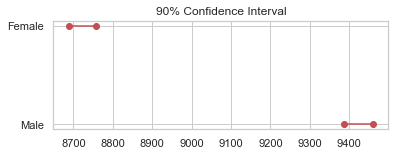

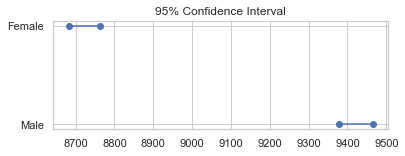

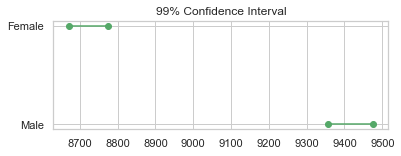

In [29]:
plt.figure(figsize=(6,2))
data_dict = {}
data_dict['category'] = ['Male','Female']
data_dict['lower'] = [round(np.percentile(bs_meansM,[5,90+5])[0], ndigits=2),round(np.percentile(bs_meansF,[5,90+5])[0], ndigits=2)]
data_dict['upper'] = [round(np.percentile(bs_meansM,[5,90+5])[1], ndigits=2),round(np.percentile(bs_meansF,[5,90+5])[1], ndigits=2)]
dataset = pd.DataFrame(data_dict)

for lower,upper,y in zip(dataset['lower'],dataset['upper'],[0.1,0.2]):
    plt.plot((lower,upper),(y,y),'ro-')
plt.yticks([0.1,0.2],list(dataset['category']))
plt.title("90% Confidence Interval")
plt.show()

plt.figure(figsize=(6,2))
data_dict = {}
data_dict['category'] = ['Male','Female']
data_dict['lower'] = [round(np.percentile(bs_meansM,[2.5,95+2.5])[0], ndigits=2),round(np.percentile(bs_meansF,[2.5,95+2.5])[0], ndigits=2)]
data_dict['upper'] = [round(np.percentile(bs_meansM,[2.5,95+2.5])[1], ndigits=2),round(np.percentile(bs_meansF,[2.5,95+2.5])[1], ndigits=2)]
dataset = pd.DataFrame(data_dict)

for lower,upper,y in zip(dataset['lower'],dataset['upper'],[0,0.2]):
    plt.plot((lower,upper),(y,y),'bo-')
plt.yticks([0,0.2],list(dataset['category']))
plt.title("95% Confidence Interval")
plt.show()

plt.figure(figsize=(6,2))
data_dict = {}
data_dict['category'] = ['Male','Female']
data_dict['lower'] = [round(np.percentile(bs_meansM,[0.5,99+0.5])[0], ndigits=2),round(np.percentile(bs_meansF,[0.5,99+0.5])[0], ndigits=2)]
data_dict['upper'] = [round(np.percentile(bs_meansM,[0.5,99+0.5])[1], ndigits=2),round(np.percentile(bs_meansF,[0.5,99+0.5])[1], ndigits=2)]
dataset = pd.DataFrame(data_dict)

for lower,upper,y in zip(dataset['lower'],dataset['upper'],[0,0.2]):
    plt.plot((lower,upper),(y,y),'go-')
plt.yticks([0,0.2],list(dataset['category']))
plt.title("99% Confidence Interval")
plt.show()

### Marital Status

We repeat similar analysis as above for marital status as well.

In [30]:
wl0 = wl[wl.Marital_Status==0]
wl1 = wl[wl.Marital_Status==1]

print("Average Purchase by UnMarried(0) Customers",np.mean(wl0["Purchase"]))
print("Average Purchase by Married(1) Customers",np.mean(wl1["Purchase"]))

Average Purchase by UnMarried(0) Customers 9252.832310435406
Average Purchase by Married(1) Customers 9246.115609065533


We perform experiments using sample sizes of 10000,20000,50000 and 100000 for Married and Unmarried Customers.

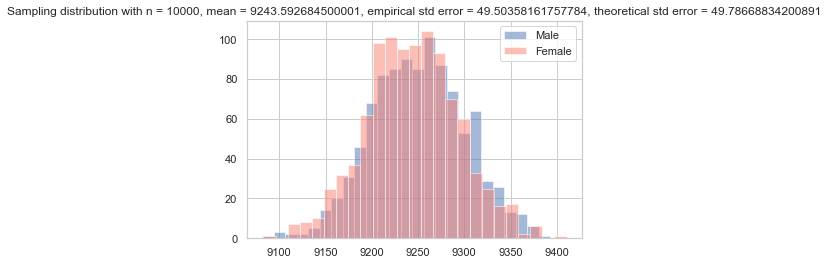

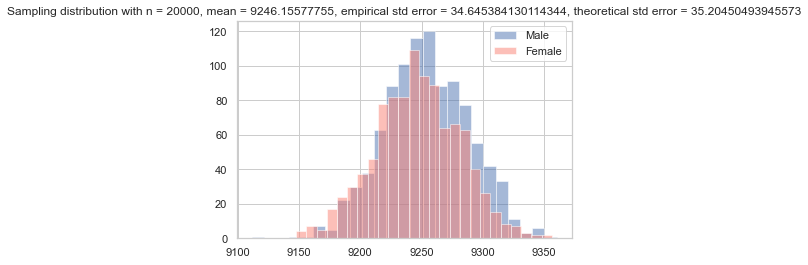

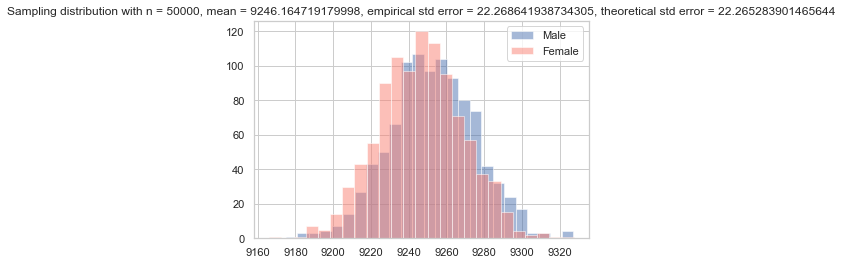

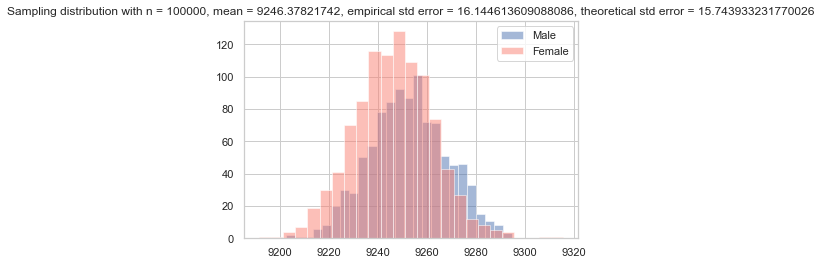

In [31]:
r = 1000 #No of samples
n_list = [10000,20000,50000,100000] #Size of each sample

sample0 = wl0["Purchase"]
sample1 = wl1["Purchase"]


for n in n_list:
    bs_means0 = np.empty(r)
    for i in range(r):
        bs_sample = np.random.choice(sample0, size=n)
        bs_means0[i] = np.mean(bs_sample)
    plt.figure()
    plt.hist(bs_means0, bins=25, label="Male", alpha=0.5)
    plt.title(f"Sampling distribution with n = {n}, mean = {np.mean(bs_means0)}, empirical std error = {np.std(bs_means0)}, theoretical std error = {np.std(sample0)/np.sqrt(n)}")
    plt.legend()
    
    bs_means1 = np.empty(r)
    for i in range(r):
        bs_sample = np.random.choice(sample1, size=n)
        bs_means1[i] = np.mean(bs_sample)
    #plt.figure()
    plt.hist(bs_means1, bins=25, label="Female", color="salmon", alpha=0.5)
    plt.title(f"Sampling distribution with n = {n}, mean = {np.mean(bs_means1)}, empirical std error = {np.std(bs_means1)}, theoretical std error = {np.std(sample1)/np.sqrt(n)}")
    plt.legend()
    
plt.show()

- Once again, it seems like 50000 offers a reasonably small standard error(~21) while not becoming too computtionally expensive like 100000 or above. The mean of the sampling distribution is also quite close to the population mean. So we carry out our confidence interval calculation with this size.

In [32]:
r = 1000 #No of samples
n = 50000 #Size of each sample

sample0 = wl0["Purchase"]
sample1 = wl1["Purchase"]


bs_means0 = np.empty(r)
for i in range(r):
    bs_sample = np.random.choice(sample0, size=n)
    bs_means0[i] = np.mean(bs_sample)

bs_means1 = np.empty(r)
for i in range(r):
    bs_sample = np.random.choice(sample1, size=n)
    bs_means1[i] = np.mean(bs_sample)

#### Confidence Interval for Sample Size 50K

We will now check the 90%, 95% and 99% confidence intervals for Married and Unmarried Customer Purchases respectively.

In [33]:
print("Average Purchase by Unmarried Customers",np.mean(wl0["Purchase"]))
print("Average Purchase by Married Customers",np.mean(wl1["Purchase"]))
print('\n')
print("90% Confidence Interval for Unmarried : (", round(np.percentile(bs_means0,[5,90+5])[0], ndigits=2), ",", round(np.percentile(bs_means0,[5,90+5])[1], ndigits=2),")")
print("90% Confidence Interval for Married : (", round(np.percentile(bs_means1,[5,90+5])[0], ndigits=2), ",", round(np.percentile(bs_means1,[5,90+5])[1], ndigits=2),")")
print('\n')
print("95% Confidence Interval for Unmarried : (", round(np.percentile(bs_means0,[2.5,95+2.5])[0], ndigits=2), ",", round(np.percentile(bs_means0,[2.5,95+2.5])[1], ndigits=2),")")
print("95% Confidence Interval for Married : (", round(np.percentile(bs_means1,[2.5,95+2.5])[0], ndigits=2), ",", round(np.percentile(bs_means1,[2.5,95+2.5])[1], ndigits=2),")")
print('\n')
print("99% Confidence Interval for Unmarried : (", round(np.percentile(bs_means0,[0.5,99+0.5])[0], ndigits=2), ",", round(np.percentile(bs_means0,[0.5,99+0.5])[1], ndigits=2),")")
print("99% Confidence Interval for Married : (", round(np.percentile(bs_means1,[0.5,99+0.5])[0], ndigits=2), ",", round(np.percentile(bs_means1,[0.5,99+0.5])[1], ndigits=2),")")

Average Purchase by Unmarried Customers 9252.832310435406
Average Purchase by Married Customers 9246.115609065533


90% Confidence Interval for Unmarried : ( 9216.65 , 9289.85 )
90% Confidence Interval for Married : ( 9208.93 , 9285.59 )


95% Confidence Interval for Unmarried : ( 9211.08 , 9296.12 )
95% Confidence Interval for Married : ( 9203.8 , 9290.67 )


99% Confidence Interval for Unmarried : ( 9193.56 , 9310.21 )
99% Confidence Interval for Married : ( 9192.85 , 9300.72 )


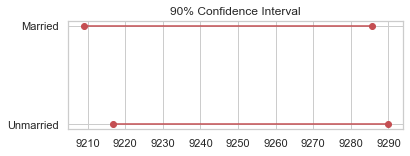

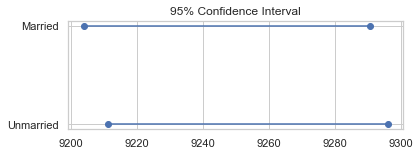

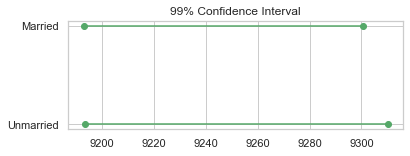

In [34]:
plt.figure(figsize=(6,2))
data_dict = {}
data_dict['category'] = ['Unmarried','Married']
data_dict['lower'] = [round(np.percentile(bs_means0,[5,90+5])[0], ndigits=2),round(np.percentile(bs_means1,[5,90+5])[0], ndigits=2)]
data_dict['upper'] = [round(np.percentile(bs_means0,[5,90+5])[1], ndigits=2),round(np.percentile(bs_means1,[5,90+5])[1], ndigits=2)]
dataset = pd.DataFrame(data_dict)

for lower,upper,y in zip(dataset['lower'],dataset['upper'],[0.1,0.2]):
    plt.plot((lower,upper),(y,y),'ro-')
plt.yticks([0.1,0.2],list(dataset['category']))
plt.title("90% Confidence Interval")
plt.show()

plt.figure(figsize=(6,2))
data_dict = {}
data_dict['category'] = ['Unmarried','Married']
data_dict['lower'] = [round(np.percentile(bs_means0,[2.5,95+2.5])[0], ndigits=2),round(np.percentile(bs_means1,[2.5,95+2.5])[0], ndigits=2)]
data_dict['upper'] = [round(np.percentile(bs_means0,[2.5,95+2.5])[1], ndigits=2),round(np.percentile(bs_means1,[2.5,95+2.5])[1], ndigits=2)]
dataset = pd.DataFrame(data_dict)

for lower,upper,y in zip(dataset['lower'],dataset['upper'],[0,0.2]):
    plt.plot((lower,upper),(y,y),'bo-')
plt.yticks([0,0.2],list(dataset['category']))
plt.title("95% Confidence Interval")
plt.show()

plt.figure(figsize=(6,2))
data_dict = {}
data_dict['category'] = ['Unmarried','Married']
data_dict['lower'] = [round(np.percentile(bs_means0,[0.5,99+0.5])[0], ndigits=2),round(np.percentile(bs_means1,[0.5,99+0.5])[0], ndigits=2)]
data_dict['upper'] = [round(np.percentile(bs_means0,[0.5,99+0.5])[1], ndigits=2),round(np.percentile(bs_means1,[0.5,99+0.5])[1], ndigits=2)]
dataset = pd.DataFrame(data_dict)

for lower,upper,y in zip(dataset['lower'],dataset['upper'],[0,0.2]):
    plt.plot((lower,upper),(y,y),'go-')
plt.yticks([0,0.2],list(dataset['category']))
plt.title("99% Confidence Interval")
plt.show()

### Age

We repeat similar analysis as above for the different age categories.

In [35]:
wl.Age.value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [36]:
wl0017 = wl[wl.Age=='0-17']
wl1825 = wl[wl.Age=='18-25']
wl2635 = wl[wl.Age=='26-35']
wl3645 = wl[wl.Age=='36-45']
wl4650 = wl[wl.Age=='46-50']
wl5155 = wl[wl.Age=='51-55']
wl55 = wl[wl.Age=='55+']

print("Average Purchase by 0-17 year old Customers",np.mean(wl0017["Purchase"]))
print("Average Purchase by 18-25 year old Customers",np.mean(wl1825["Purchase"]))
print("Average Purchase by 26-35 year old Customers",np.mean(wl2635["Purchase"]))
print("Average Purchase by 36-45 year old Customers",np.mean(wl3645["Purchase"]))
print("Average Purchase by 46-50 year old Customers",np.mean(wl4650["Purchase"]))
print("Average Purchase by 51-55 year old Customers",np.mean(wl5155["Purchase"]))
print("Average Purchase by 55+ year old Customers",np.mean(wl55["Purchase"]))

Average Purchase by 0-17 year old Customers 8920.849225268177
Average Purchase by 18-25 year old Customers 9160.685229781257
Average Purchase by 26-35 year old Customers 9240.555492811505
Average Purchase by 36-45 year old Customers 9315.346240898803
Average Purchase by 46-50 year old Customers 9192.86665499661
Average Purchase by 51-55 year old Customers 9511.601023350044
Average Purchase by 55+ year old Customers 9312.336867559523


Going by our past experience, we can consider sample size of 50K for our CI calculation because it can become computationally expensive and time consuming to go through different sizes for all the different categories of age.

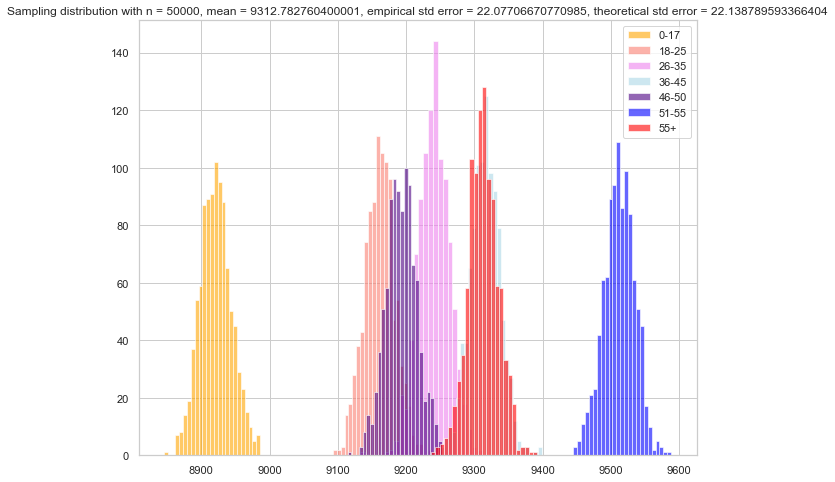

In [37]:
r = 1000 #No of samples
n = 50000

sample0017 = wl0017["Purchase"]
sample1825 = wl1825["Purchase"]
sample2635 = wl2635["Purchase"]
sample3645 = wl3645["Purchase"]
sample4650 = wl4650["Purchase"]
sample5155 = wl5155["Purchase"]
sample55 = wl55["Purchase"]



bs_means0017 = np.empty(r)
for i in range(r):
    bs_sample = np.random.choice(sample0017, size=n)
    bs_means0017[i] = np.mean(bs_sample)
plt.figure(figsize=(10,8))
plt.hist(bs_means0017, bins=25, label="0-17",color="orange",alpha=0.6)
plt.title(f"Sampling distribution with n = {n}, mean = {np.mean(bs_means0017)}, empirical std error = {np.std(bs_means0017)}, theoretical std error = {np.std(sample0017)/np.sqrt(n)}")
plt.legend()

bs_means1825 = np.empty(r)
for i in range(r):
    bs_sample = np.random.choice(sample1825, size=n)
    bs_means1825[i] = np.mean(bs_sample)
#plt.figure()
plt.hist(bs_means1825, bins=25, label="18-25", color="salmon",alpha=0.6)
plt.title(f"Sampling distribution with n = {n}, mean = {np.mean(bs_means1825)}, empirical std error = {np.std(bs_means1825)}, theoretical std error = {np.std(sample1825)/np.sqrt(n)}")
plt.legend()

bs_means2635 = np.empty(r)
for i in range(r):
    bs_sample = np.random.choice(sample2635, size=n)
    bs_means2635[i] = np.mean(bs_sample)
#plt.figure()
plt.hist(bs_means2635, bins=25, label="26-35", color="violet",alpha=0.6)
plt.title(f"Sampling distribution with n = {n}, mean = {np.mean(bs_means2635)}, empirical std error = {np.std(bs_means2635)}, theoretical std error = {np.std(sample2635)/np.sqrt(n)}")
plt.legend()

bs_means3645 = np.empty(r)
for i in range(r):
    bs_sample = np.random.choice(sample3645, size=n)
    bs_means3645[i] = np.mean(bs_sample)
#plt.figure()
plt.hist(bs_means3645, bins=25, label="36-45",color="lightblue",alpha=0.6)
plt.title(f"Sampling distribution with n = {n}, mean = {np.mean(bs_means3645)}, empirical std error = {np.std(bs_means3645)}, theoretical std error = {np.std(sample3645)/np.sqrt(n)}")
plt.legend()

bs_means4650 = np.empty(r)
for i in range(r):
    bs_sample = np.random.choice(sample4650, size=n)
    bs_means4650[i] = np.mean(bs_sample)
#plt.figure()
plt.hist(bs_means4650, bins=25, label="46-50",color="indigo",alpha=0.6)
plt.title(f"Sampling distribution with n = {n}, mean = {np.mean(bs_means4650)}, empirical std error = {np.std(bs_means4650)}, theoretical std error = {np.std(sample4650)/np.sqrt(n)}")
plt.legend()

bs_means5155 = np.empty(r)
for i in range(r):
    bs_sample = np.random.choice(sample5155, size=n)
    bs_means5155[i] = np.mean(bs_sample)
#plt.figure()
plt.hist(bs_means5155, bins=25, label="51-55",color="blue",alpha=0.6)
plt.title(f"Sampling distribution with n = {n}, mean = {np.mean(bs_means5155)}, empirical std error = {np.std(bs_means5155)}, theoretical std error = {np.std(sample5155)/np.sqrt(n)}")
plt.legend()

bs_means55 = np.empty(r)
for i in range(r):
    bs_sample = np.random.choice(sample55, size=n)
    bs_means55[i] = np.mean(bs_sample)
#plt.figure()
plt.hist(bs_means55, bins=25, label="55+",color="red",alpha=0.6)
plt.title(f"Sampling distribution with n = {n}, mean = {np.mean(bs_means55)}, empirical std error = {np.std(bs_means55)}, theoretical std error = {np.std(sample55)/np.sqrt(n)}")
plt.legend()
    

    
plt.show()

- Once again, it seems like 50000 offers a reasonably small standard error(~22). The mean of the sampling distribution is also quite close to the population mean. So we carry out our confidence interval calculation with this size.

#### Confidence Interval for Sample Size 50K

We will now check the 90%, 95% and 99% confidence intervals for customers from different age groups.

In [38]:
print("Average Purchase by 0-17 year old Customers",np.mean(wl0017["Purchase"]))
print("Average Purchase by 18-25 year old Customers",np.mean(wl1825["Purchase"]))
print("Average Purchase by 26-35 year old Customers",np.mean(wl2635["Purchase"]))
print("Average Purchase by 36-45 year old Customers",np.mean(wl3645["Purchase"]))
print("Average Purchase by 46-50 year old Customers",np.mean(wl4650["Purchase"]))
print("Average Purchase by 51-55 year old Customers",np.mean(wl5155["Purchase"]))
print("Average Purchase by 55+ year old Customers",np.mean(wl55["Purchase"]))
print('\n')
print("90% Confidence Interval for 0-17 : (", round(np.percentile(bs_means0017,[5,90+5])[0], ndigits=2), ",", round(np.percentile(bs_means0017,[5,90+5])[1], ndigits=2),")")
print("90% Confidence Interval for 18-25 : (", round(np.percentile(bs_means1825,[5,90+5])[0], ndigits=2), ",", round(np.percentile(bs_means1825,[5,90+5])[1], ndigits=2),")")
print("90% Confidence Interval for 26-35 : (", round(np.percentile(bs_means2635,[5,90+5])[0], ndigits=2), ",", round(np.percentile(bs_means2635,[5,90+5])[1], ndigits=2),")")
print("90% Confidence Interval for 36-45 : (", round(np.percentile(bs_means3645,[5,90+5])[0], ndigits=2), ",", round(np.percentile(bs_means3645,[5,90+5])[1], ndigits=2),")")
print("90% Confidence Interval for 46-50 : (", round(np.percentile(bs_means4650,[5,90+5])[0], ndigits=2), ",", round(np.percentile(bs_means4650,[5,90+5])[1], ndigits=2),")")
print("90% Confidence Interval for 51-55 : (", round(np.percentile(bs_means5155,[5,90+5])[0], ndigits=2), ",", round(np.percentile(bs_means5155,[5,90+5])[1], ndigits=2),")")
print("90% Confidence Interval for 55+ : (", round(np.percentile(bs_means55,[5,90+5])[0], ndigits=2), ",", round(np.percentile(bs_means55,[5,90+5])[1], ndigits=2),")")
print('\n')
print("95% Confidence Interval for 0-17 : (", round(np.percentile(bs_means0017,[2.5,95+2.5])[0], ndigits=2), ",", round(np.percentile(bs_means0017,[2.5,95+2.5])[1], ndigits=2),")")
print("95% Confidence Interval for 18-25 : (", round(np.percentile(bs_means1825,[2.5,95+2.5])[0], ndigits=2), ",", round(np.percentile(bs_means1825,[2.5,95+2.5])[1], ndigits=2),")")
print("95% Confidence Interval for 26-35 : (", round(np.percentile(bs_means2635,[2.5,95+2.5])[0], ndigits=2), ",", round(np.percentile(bs_means2635,[2.5,95+2.5])[1], ndigits=2),")")
print("95% Confidence Interval for 36-45 : (", round(np.percentile(bs_means3645,[2.5,95+2.5])[0], ndigits=2), ",", round(np.percentile(bs_means3645,[2.5,95+2.5])[1], ndigits=2),")")
print("95% Confidence Interval for 46-50 : (", round(np.percentile(bs_means4650,[2.5,95+2.5])[0], ndigits=2), ",", round(np.percentile(bs_means4650,[2.5,95+2.5])[1], ndigits=2),")")
print("95% Confidence Interval for 51-55 : (", round(np.percentile(bs_means5155,[2.5,95+2.5])[0], ndigits=2), ",", round(np.percentile(bs_means5155,[2.5,95+2.5])[1], ndigits=2),")")
print("95% Confidence Interval for 55+ : (", round(np.percentile(bs_means55,[2.5,95+2.5])[0], ndigits=2), ",", round(np.percentile(bs_means55,[2.5,95+2.5])[1], ndigits=2),")")
print('\n')
print("99% Confidence Interval for 0-17 : (", round(np.percentile(bs_means0017,[0.5,99+0.5])[0], ndigits=2), ",", round(np.percentile(bs_means0017,[0.5,99+0.5])[1], ndigits=2),")")
print("99% Confidence Interval for 18-25 : (", round(np.percentile(bs_means1825,[0.5,99+0.5])[0], ndigits=2), ",", round(np.percentile(bs_means1825,[0.5,99+0.5])[1], ndigits=2),")")
print("99% Confidence Interval for 26-35 : (", round(np.percentile(bs_means2635,[0.5,99+0.5])[0], ndigits=2), ",", round(np.percentile(bs_means2635,[0.5,99+0.5])[1], ndigits=2),")")
print("99% Confidence Interval for 36-45 : (", round(np.percentile(bs_means3645,[0.5,99+0.5])[0], ndigits=2), ",", round(np.percentile(bs_means3645,[0.5,99+0.5])[1], ndigits=2),")")
print("99% Confidence Interval for 46-50 : (", round(np.percentile(bs_means4650,[0.5,99+0.5])[0], ndigits=2), ",", round(np.percentile(bs_means4650,[0.5,99+0.5])[1], ndigits=2),")")
print("99% Confidence Interval for 51-55 : (", round(np.percentile(bs_means5155,[0.5,99+0.5])[0], ndigits=2), ",", round(np.percentile(bs_means5155,[0.5,99+0.5])[1], ndigits=2),")")
print("99% Confidence Interval for 55+ : (", round(np.percentile(bs_means55,[0.5,99+0.5])[0], ndigits=2), ",", round(np.percentile(bs_means55,[0.5,99+0.5])[1], ndigits=2),")")
print('\n')

Average Purchase by 0-17 year old Customers 8920.849225268177
Average Purchase by 18-25 year old Customers 9160.685229781257
Average Purchase by 26-35 year old Customers 9240.555492811505
Average Purchase by 36-45 year old Customers 9315.346240898803
Average Purchase by 46-50 year old Customers 9192.86665499661
Average Purchase by 51-55 year old Customers 9511.601023350044
Average Purchase by 55+ year old Customers 9312.336867559523


90% Confidence Interval for 0-17 : ( 8884.94 , 8959.33 )
90% Confidence Interval for 18-25 : ( 9124.31 , 9197.97 )
90% Confidence Interval for 26-35 : ( 9204.64 , 9277.33 )
90% Confidence Interval for 36-45 : ( 9278.97 , 9351.15 )
90% Confidence Interval for 46-50 : ( 9155.66 , 9230.88 )
90% Confidence Interval for 51-55 : ( 9473.01 , 9547.01 )
90% Confidence Interval for 55+ : ( 9277.21 , 9350.02 )


95% Confidence Interval for 0-17 : ( 8877.45 , 8967.4 )
95% Confidence Interval for 18-25 : ( 9116.49 , 9204.96 )
95% Confidence Interval for 26-35 : ( 9195

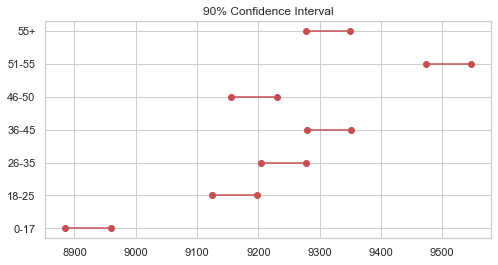

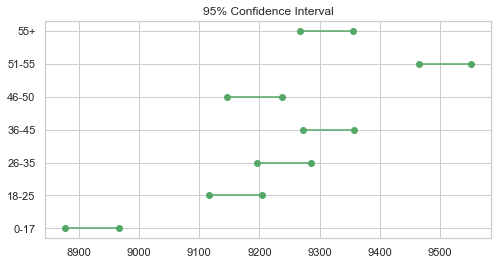

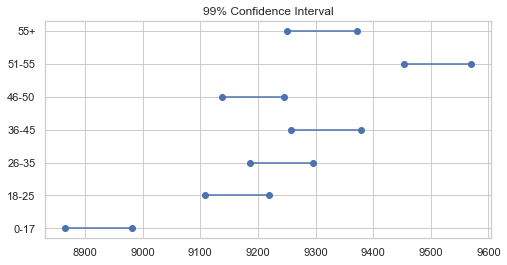

In [39]:
bs = [bs_means0017,bs_means1825,bs_means2635,bs_means3645,bs_means4650,bs_means5155,bs_means55]


plt.figure(figsize=(8,4))
data_dict = {}
data_dict['category'] = ['0-17','18-25','26-35','36-45','46-50','51-55','55+']
data_dict['lower'] = [round(np.percentile(bs[i],[5,90+5])[0], ndigits=2) for i in range(7)]
data_dict['upper'] = [round(np.percentile(bs[i],[5,90+5])[1], ndigits=2) for i in range(7)]
dataset = pd.DataFrame(data_dict)

for lower,upper,y in zip(dataset['lower'],dataset['upper'],[0.1,0.2,0.3,0.4,0.5,0.6,0.7]):
    plt.plot((lower,upper),(y,y),'ro-')
plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7],list(dataset['category']))
plt.title("90% Confidence Interval")
plt.show()


plt.figure(figsize=(8,4))
data_dict = {}
data_dict['category'] = ['0-17','18-25','26-35','36-45','46-50','51-55','55+']
data_dict['lower'] = [round(np.percentile(bs[i],[2.5,95+2.5])[0], ndigits=2) for i in range(7)]
data_dict['upper'] = [round(np.percentile(bs[i],[2.5,95+2.5])[1], ndigits=2) for i in range(7)]
dataset = pd.DataFrame(data_dict)

for lower,upper,y in zip(dataset['lower'],dataset['upper'],[0.1,0.2,0.3,0.4,0.5,0.6,0.7]):
    plt.plot((lower,upper),(y,y),'go-')
plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7],list(dataset['category']))
plt.title("95% Confidence Interval")
plt.show()


plt.figure(figsize=(8,4))
data_dict = {}
data_dict['category'] = ['0-17','18-25','26-35','36-45','46-50','51-55','55+']
data_dict['lower'] = [round(np.percentile(bs[i],[0.5,99+0.5])[0], ndigits=2) for i in range(7)]
data_dict['upper'] = [round(np.percentile(bs[i],[0.5,99+0.5])[1], ndigits=2) for i in range(7)]
dataset = pd.DataFrame(data_dict)

for lower,upper,y in zip(dataset['lower'],dataset['upper'],[0.1,0.2,0.3,0.4,0.5,0.6,0.7]):
    plt.plot((lower,upper),(y,y),'bo-')
plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7],list(dataset['category']))
plt.title("99% Confidence Interval")
plt.show()